# Author : Chintamani Madhukar Kasture

## GRIP @The Sparks Foundation GRIPJUNE21

### Task 2 : Prediction using UnSupervised Maching Learning Model

#### Objective:To predict the optimum number of clusters and represent it visually using K-Means Algorithim.

### Here we are importing the necessary libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
iris = pd.read_csv('Iris.csv')# loading the file using read_csv command

In [21]:
iris.head() # will give you the first 5 rows of the dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()# will give you the last 5 rows of the dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isnull().sum() # this command will show total number of null values in particular column

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

Here we see there are no null values in the dataset

In [7]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print(iris.Species.value_counts()) # this will show total count of each species

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


## Data Visualization

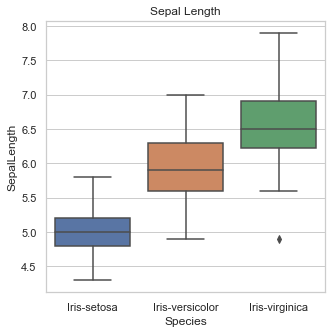

In [9]:
plt.figure(figsize=(5,5))
sns.set_theme(style='whitegrid')
sns.boxplot(x='Species',y='SepalLength',data=iris)
plt.title('Sepal Length')
plt.show()

#### Here we see that in Species Iris-virginica there in ONE outlier .

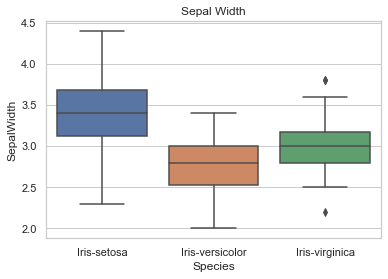

In [10]:
sns.boxplot(x='Species',y='SepalWidth',data=iris)
plt.title('Sepal Width')
plt.show()

#### Here we see that in Species Iris-virginica there in TWO outlier  where first outlier is from the range 2.0 to 2.5 and second outlier is in the range 3.7 to 4.0.

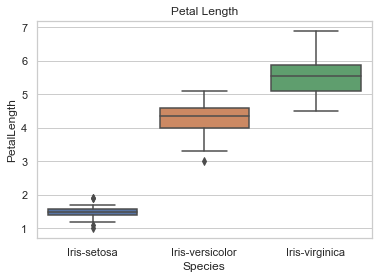

In [11]:
sns.boxplot(x='Species',y='PetalLength',data=iris)
plt.title('Petal Length')
plt.show()

#### Here we see that in Species Iris-setosa there are some outliers and in Iris-versicolor aslo there is one outlier

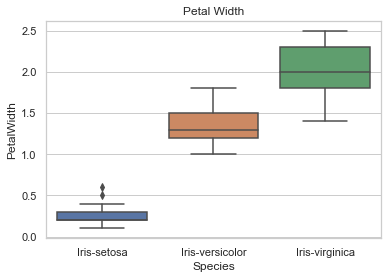

In [12]:
sns.boxplot(x='Species',y='PetalWidth',data=iris)
plt.title('Petal Width')
plt.show()

#### Here we see that in Species Iris-setosa there TWO outliers

#### Now we will come to are main objective that is to finding the optimum number of clusters using K-Means Clustering Algoritham.

# Elbow Curve

In [13]:
from sklearn.cluster import KMeans
WCSS=[]#Within cluster sum of squares
x = iris.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


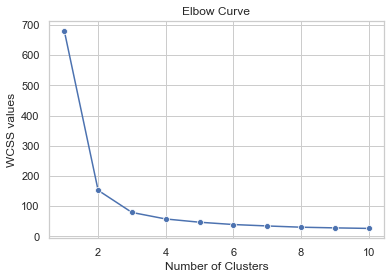

In [14]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)#Inertia means sum of all the points in the cluster from centroid to that cluster
sns.lineplot(range(1,11),WCSS,marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS values')
plt.show()

#### Optimum cluster is where the elbow occures.This is when the WCSS doesn't decrease significantly with every iteration. Here we see that after 3rd iteration decrease in WCSS is very less compared to 1st and 2nd iteration

### So here 3 is the optimum value for the clusters

In [15]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300)
k=kmeans.fit_predict(x)

In [16]:
k

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [17]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

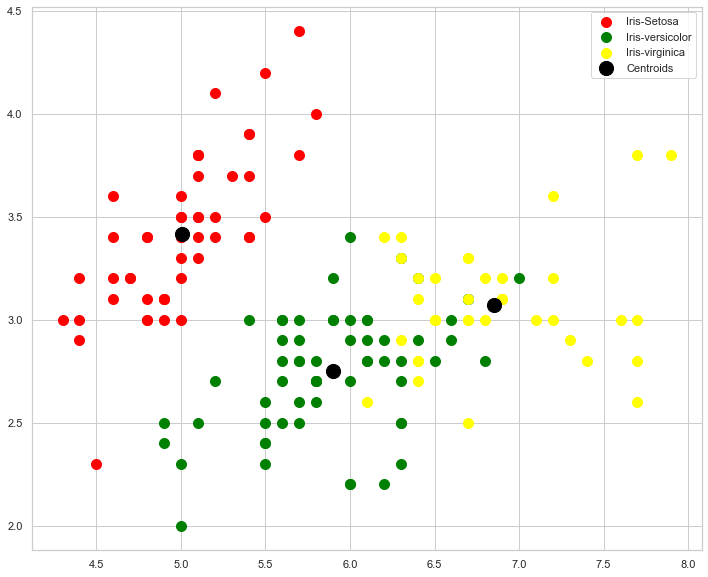

In [18]:
plt.figure(figsize=(12,10))
plt.scatter(x[k==0,0],x[k==0,1],s=100,c='red',label='Iris-Setosa')
plt.scatter(x[k==1,0],x[k==1,1],s=100,c='green',label='Iris-versicolor')
plt.scatter(x[k==2,0],x[k==2,1],s=100,c='yellow',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids')
plt.legend()
plt.show()


## Thank You